# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
# Make column names lowercase
df.columns = [col.lower() for col in df.columns]

# Remove excess whitespace in column names
df.columns = [col.replace(' ','') for col in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [4]:
# Change index to 'linename' column
new_index = df.linename
df = df.set_index(new_index)

# Drop redundant 'linename' column
df = df.drop('linename', axis = 1)
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [5]:
# Reset index to original
new_index = list(range(0,len(df)))
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [9]:
# Create 'Num_Lines' column to store number of lines passing through a station
df['Num_Lines'] = [len(value) for value in df.linename]
df = df.sort_values(by='Num_Lines', ascending = False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [10]:
def clean(col_name):
    cleaned = col_name.lower().replace(' ','')
    return cleaned

In [11]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [12]:
# Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

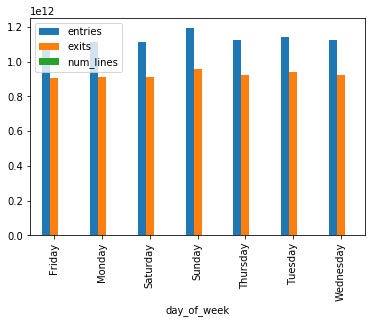

In [19]:
# Convert 'date' column to datetime dtype
df['date'] = pd.to_datetime(df.date)
df['day_of_week'] = df.date.dt.day_name()

# Group by day of week and calculate total entries + exits
grouped_by_day = df.groupby('day_of_week').sum()

# Create a bar chart 
grouped_by_day.plot(kind='bar')
plt.show();

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [21]:
# Ungroup the data
grouped_by_day = grouped_by_day.reset_index()
grouped_by_day.head(10)

,index,day_of_week,entries,exits,num_lines
0,0,Friday,1110224700078,906799065337,75573
1,1,Monday,1114237052454,911938153513,76110
2,2,Saturday,1115661545514,909142081474,74725
3,3,Sunday,1192306179082,959223750461,75306
4,4,Thursday,1122723988662,920691927110,76607
5,5,Tuesday,1143313287046,942230721477,77303
6,6,Wednesday,1123655222441,920630864687,75713


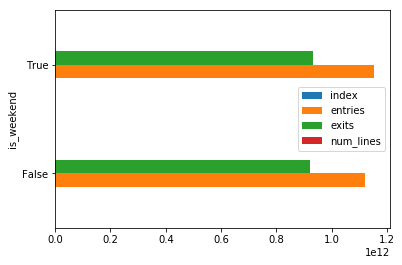

In [23]:
grouped_by_day['is_weekend'] = grouped_by_day['day_of_week'].map({'Monday': False,
                                                                 'Tuesday': False,
                                                                 'Wednesday': False,
                                                                 'Thursday': False,
                                                                 'Friday': False,
                                                                 'Saturday': True,
                                                                 'Sunday': True})
grouped_by_weekend = grouped_by_day.groupby('is_weekend').mean()
grouped_by_weekend.plot(kind="barh")
plt.show()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

The numbers of entries and exits are running (cumulative) totals, so we shouldn't be adding or averaging them as though they were independent observations. 

## Drop a couple of columns

In [25]:
# Drop 'c/a', 'unit', and 'division' columns
df = df.drop(['c/a', 'unit', 'division'], axis = 1)
df.head()

,linename,scp,station,date,time,desc,entries,exits,num_lines,day_of_week
132292,1237ACENQRSW,00-00-00,TIMES SQ-42 ST,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,01-00-01,TIMES SQ-42 ST,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2673,ACENQRS1237W,01-00-01,TIMES SQ-42 ST,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
2674,ACENQRS1237W,01-00-01,TIMES SQ-42 ST,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
2675,ACENQRS1237W,01-00-01,TIMES SQ-42 ST,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday


## Summary

Great! You practiced your data cleanup-skills using Pandas.